In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline
plt.style.use('ggplot')

In [2]:
kaggle = pd.read_csv('data/ks-projects-201801.csv', parse_dates=['deadline', 'launched'])
kaggle.columns

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged', 'usd_pledged_real', 'usd_goal_real'],
      dtype='object')

In [3]:
# remove duplicate columns and keep columns that are converted to US currency for consistency
kaggle = kaggle.drop(['pledged', 'usd pledged', 'goal'], axis =1)

In [4]:
kaggle.head()

,ID,name,category,main_category,currency,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,2015-08-11 12:12:28,failed,0,GB,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,2017-09-02 04:43:57,failed,15,US,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,2013-01-12 00:20:50,failed,3,US,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,2012-03-17 03:24:11,failed,1,US,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,2015-07-04 08:35:03,canceled,14,US,1283.0,19500.00


In [5]:
# Not enough data in kaggle dataset, so supplement with harvard dataset
harvard = pd.read_csv('data/harvard_kickstarter.csv', low_memory=False)

In [6]:
# add a rewards column from a sql query from harvard database

rewards = pd.read_csv('data/reward_counts.csv')
# rename column for merging
rewards = rewards.rename(columns = {'project_id':'id', 'count(reward)':'reward_count'})

In [7]:
harvard['successful_at'] = pd.to_datetime(harvard['successful_at'], unit='s')

In [8]:
harvard.columns

Index(['id', 'state', 'url_project', 'url_project_short', 'name', 'country',
       'creator_id', 'location_id', 'category_id', 'created_at', 'deadline',
       'updated_at', 'state_changed_at', 'successful_at', 'launched_at',
       'goal', 'pledged', 'currency', 'currency_symbol', 'usd_pledged',
       'static_usd_rate', 'backers_count', 'comments_count', 'updates_count',
       'spotlight', 'staff_pick', 'blurb', 'currency_trailing_code',
       'disable_communication', 'photo_url', 'profile_background_color',
       'profile_background_image_opacity', 'profile_blurb', 'profile_id',
       'profile_link_background_color', 'profile_link_text',
       'profile_link_text_color', 'profile_link_url', 'profile_name',
       'profile_project_id', 'profile_should_show_feature_image_section',
       'profile_show_feature_image', 'profile_state',
       'profile_state_changed_at', 'profile_text_color', 'slug', 'url_rewards',
       'url_updates', 'video_id', 'video_url_high', 'video_url_webm'

In [9]:
# ignoring URLs, User Info
harvard = harvard.drop(['url_project', 'url_project_short', 'creator_id','currency_symbol', 'static_usd_rate',
                        'currency_trailing_code', 'disable_communication', 'photo_url', 'profile_background_color',
                        'profile_background_image_opacity','profile_blurb', 'profile_id', 'profile_blurb', 'profile_id',
                        'profile_link_background_color', 'profile_link_text',
                        'profile_link_text_color', 'profile_link_url', 'profile_name',
                        'profile_project_id', 'profile_should_show_feature_image_section',
                        'profile_show_feature_image', 'profile_state',
                        'profile_state_changed_at', 'profile_text_color','slug', 'url_rewards',
                        'url_updates', 'video_id', 'video_url_high', 'video_url_webm',
                        'video_height', 'video_width', 'video_status', 'file_name',
                        'last_modification', 'deleted_comments'], axis = 1)

In [10]:
# remove duplicate and unnecessary columns in harvard df
harvard = harvard.drop(['state', 'name', 'country', 'location_id', 'category_id','created_at', 
                        'deadline','updated_at', 'state_changed_at','launched_at', 'goal', 
                        'pledged', 'currency', 'usd_pledged', 'backers_count'], axis = 1)

In [11]:
harvard_merged = pd.merge(harvard, rewards, on = 'id', how = 'inner')

In [12]:
harvard_merged.columns

Index(['id', 'successful_at', 'comments_count', 'updates_count', 'spotlight',
       'staff_pick', 'blurb', 'reward_count'],
      dtype='object')

In [13]:
# rename column for merging
kaggle = kaggle.rename(columns = {'ID':'id'})

In [14]:
# Join Kaggle and Harvard Datasets

df = pd.merge(kaggle, harvard_merged, on = 'id', how = 'inner')

In [15]:
df.columns

Index(['id', 'name', 'category', 'main_category', 'currency', 'deadline',
       'launched', 'state', 'backers', 'country', 'usd_pledged_real',
       'usd_goal_real', 'successful_at', 'comments_count', 'updates_count',
       'spotlight', 'staff_pick', 'blurb', 'reward_count'],
      dtype='object')

In [16]:
# ID not necessary

df = df.drop(['id'], axis =1)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 360637 entries, 0 to 360636
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   name              360633 non-null  object        
 1   category          360637 non-null  object        
 2   main_category     360637 non-null  object        
 3   currency          360637 non-null  object        
 4   deadline          360637 non-null  datetime64[ns]
 5   launched          360637 non-null  datetime64[ns]
 6   state             360637 non-null  object        
 7   backers           360637 non-null  int64         
 8   country           360637 non-null  object        
 9   usd_pledged_real  360637 non-null  float64       
 10  usd_goal_real     360637 non-null  float64       
 11  successful_at     134803 non-null  datetime64[ns]
 12  comments_count    360637 non-null  int64         
 13  updates_count     360637 non-null  int64         
 14  spot

In [18]:
df.isna().sum()

name                     4
category                 0
main_category            0
currency                 0
deadline                 0
launched                 0
state                    0
backers                  0
country                  0
usd_pledged_real         0
usd_goal_real            0
successful_at       225834
comments_count           0
updates_count            0
spotlight                0
staff_pick               0
blurb                   25
reward_count             0
dtype: int64

In [19]:
df.shape

(360637, 18)

In [20]:
# fill the 4 rows with name missing and 25 rows with blurb missing (with 'blank')
# fill successful_at NA with values from deadline
df = df.fillna(value = {'name':'blank', 'blurb':'blank', 'successful_at':df['deadline']})

In [21]:
#messy data
df.spotlight.value_counts()

False    195227
True     102996
1         31807
0         30607
Name: spotlight, dtype: int64

In [22]:
#messy data
df.staff_pick.value_counts()

False    272480
0         52844
True      25743
1          9570
Name: staff_pick, dtype: int64

In [23]:
# fix messy data spotlight

df['spotlight'] = df['spotlight'].apply(lambda x: 1 if (x == 'True' or x == '1') else 0)

In [24]:
# ratio of spotlight to non-spotlight projects
counts = df.spotlight.value_counts()
spotlight_proportion = counts/counts.sum()
spotlight_proportion

0    0.626209
1    0.373791
Name: spotlight, dtype: float64

In [25]:
#fix messy data staff_pick

df['staff_pick'] = df['staff_pick'].apply(lambda x: 1 if (x == 'True' or x == '1') else 0)

In [26]:
# ratio of staff_pick to non-staff_pick projects
counts = df.staff_pick.value_counts()
staff_pick_proportion = counts/counts.sum()
staff_pick_proportion

0    0.902082
1    0.097918
Name: staff_pick, dtype: float64

In [27]:
states = df.state.value_counts(); states

failed        189491
successful    132754
canceled       32209
live            2751
undefined       2002
suspended       1430
Name: state, dtype: int64

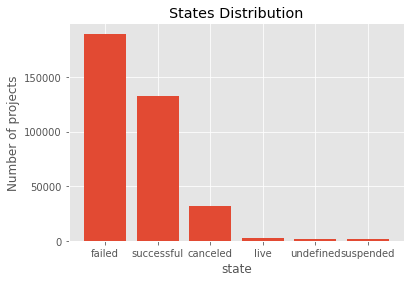

In [28]:
plt.bar(x = states.index, height = states.values)
plt.title('States Distribution')
plt.ylabel('Number of projects')
plt.xlabel('state')
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=15) 
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize = 15)

In [29]:
#drop live state, suspended, undefined projects
#suspended project broke kickstarter rules, undefined projects possibly not yet launched or missing data

df = df[df.state != 'live']
df = df[df.state != 'suspended']
df = df[df.state != 'undefined']

In [30]:
df.state.value_counts()

failed        189491
successful    132754
canceled       32209
Name: state, dtype: int64

In [31]:
# sucessful labeled as 1, failed and canceled labeled as 0

df['state'] = (df['state'] == 'successful')*1

In [32]:
counts = df.state.value_counts()
counts

0    221700
1    132754
Name: state, dtype: int64

In [33]:
state_proportion = counts/counts.sum()
state_proportion

0    0.625469
1    0.374531
Name: state, dtype: float64

In [34]:
df.deadline.min()

Timestamp('2009-05-03 00:00:00')

In [35]:
df.deadline.max()

Timestamp('2018-02-20 00:00:00')

In [36]:
df.launched.min()

Timestamp('2009-04-21 21:02:48')

In [37]:
df.launched.max()

Timestamp('2017-12-29 21:06:11')

In [38]:
df.launched.idxmax()

59138

In [39]:
df.iloc[59156]

name                Apollo Pieces: Unique 550 Premium Paracord Bra...
category                                                  Accessories
main_category                                                 Fashion
currency                                                          USD
deadline                                          2015-04-06 00:00:00
launched                                          2015-03-04 01:30:50
state                                                               1
backers                                                           205
country                                                            US
usd_pledged_real                                                 8203
usd_goal_real                                                    1500
successful_at                                     2015-04-06 09:59:03
comments_count                                                     47
updates_count                                                      12
spotlight           

In [40]:
df['launched'].groupby(df.launched.dt.year).count()

launched
2009     1288
2010    10454
2011    26181
2012    41111
2013    44791
2014    65923
2015    66066
2016    52407
2017    46233
Name: launched, dtype: int64

In [41]:
# drop lauch year 1970 due to launch date error

df = df[df.launched.dt.year != 1970]

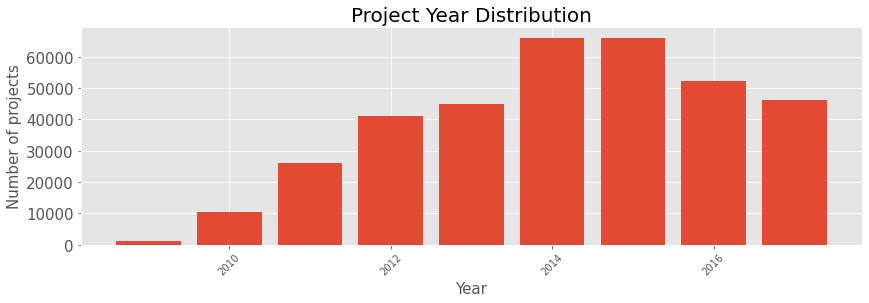

In [42]:
years = df['launched'].groupby(df.launched.dt.year).count()

fig, ax = plt.subplots(1, figsize = (14, 4))

ax.bar(x = years.index, height = years.values)
plt.title('Project Year Distribution')
plt.ylabel('Number of projects')
plt.xlabel('Year')
plt.rc('xtick', labelsize=10) 
plt.xticks(rotation =45)
plt.rc('ytick', labelsize=15) 
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize = 15)

In [43]:
df['launched'].groupby(df.launched.dt.year).count()

launched
2009     1288
2010    10454
2011    26181
2012    41111
2013    44791
2014    65923
2015    66066
2016    52407
2017    46233
Name: launched, dtype: int64

In [44]:
category = df['category'].value_counts(); category

Product Design     19827
Documentary        15009
Tabletop Games     12905
Music              12266
Shorts             11966
                   ...  
Residencies           69
Letterpress           47
Chiptune              35
Literary Spaces       23
Taxidermy             11
Name: category, Length: 159, dtype: int64

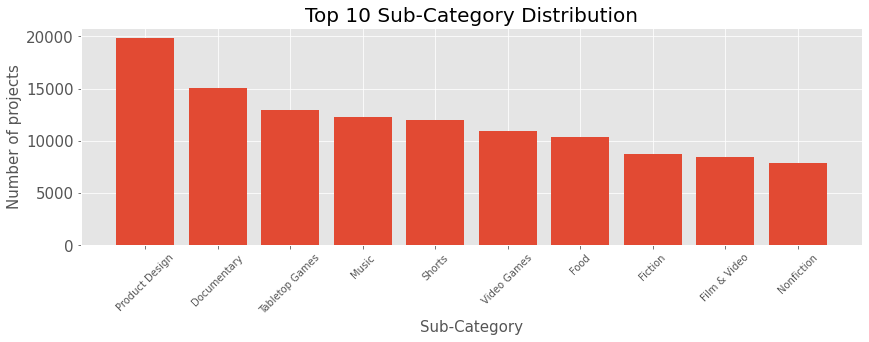

In [45]:
fig, ax = plt.subplots(1, figsize = (14, 4))

ax.bar(x = category.index[:10], height = category.values[:10])
plt.title('Top 10 Sub-Category Distribution')
plt.ylabel('Number of projects')
plt.xlabel('Sub-Category')
plt.xticks(rotation =45)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=15) 
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize = 15)

In [46]:
main_category = df['main_category'].value_counts();  main_category

Film & Video    59944
Music           47949
Publishing      37365
Games           32140
Technology      30065
Art             26784
Design          26730
Food            23209
Fashion         21579
Theater         10800
Comics          10597
Photography     10558
Crafts           8345
Journalism       4660
Dance            3729
Name: main_category, dtype: int64

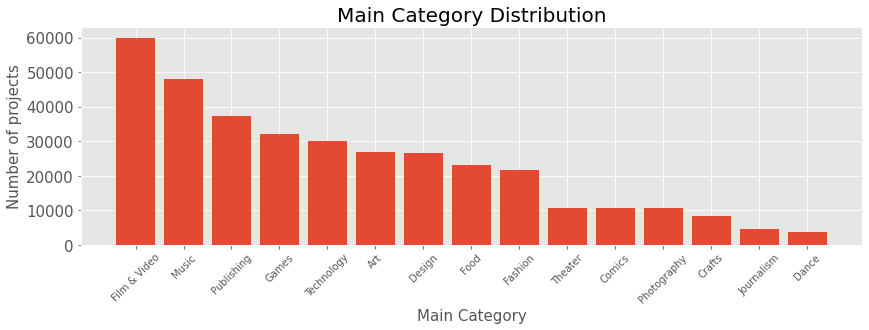

In [47]:
fig, ax = plt.subplots(1, figsize = (14, 4))

ax.bar(x = main_category.index, height = main_category.values)
plt.title('Main Category Distribution')
plt.ylabel('Number of projects')
plt.xlabel('Main Category')
plt.rc('xtick', labelsize=10) 
plt.xticks(rotation =45)
plt.rc('ytick', labelsize=15) 
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize = 15)

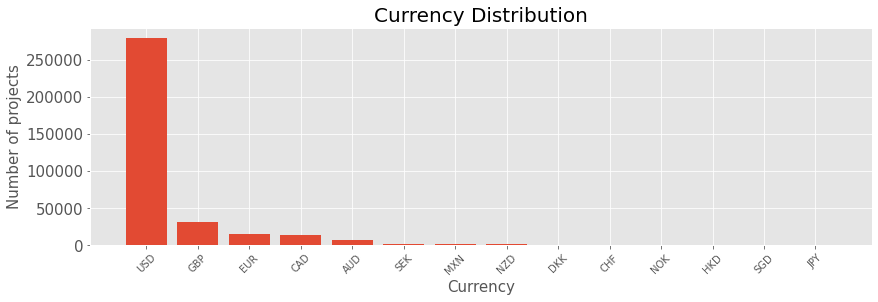

In [48]:
currency = df['currency'].value_counts()

fig, ax = plt.subplots(1, figsize = (14, 4))

ax.bar(x = currency.index, height = currency.values)
plt.title('Currency Distribution')
plt.ylabel('Number of projects')
plt.xlabel('Currency')
plt.rc('xtick', labelsize=10) 
plt.xticks(rotation =45)
plt.rc('ytick', labelsize=15) 
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize = 15)

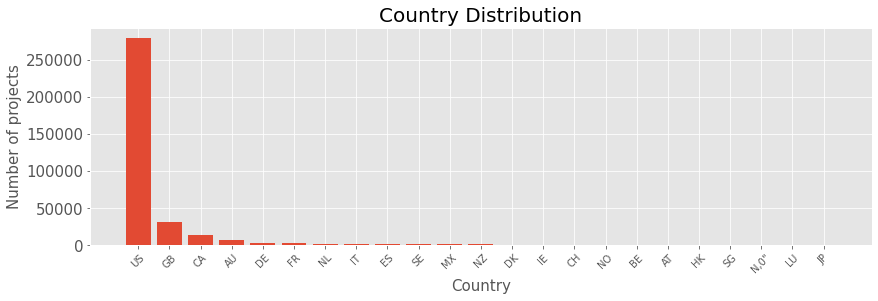

In [49]:
# similar distribution to currency so omit this column

country = df['country'].value_counts()

fig, ax = plt.subplots(1, figsize = (14, 4))

ax.bar(x = country.index, height = country.values)
plt.title('Country Distribution')
plt.ylabel('Number of projects')
plt.xlabel('Country')
plt.rc('xtick', labelsize=10) 
plt.xticks(rotation =45)
plt.rc('ytick', labelsize=15) 
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize = 15)

In [50]:
df.head()

,name,category,main_category,currency,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real,successful_at,comments_count,updates_count,spotlight,staff_pick,blurb,reward_count
0,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,2015-08-11 12:12:28,0,0,GB,0.0,1533.95,2015-10-09,0,0,0,0,A series of poems about pure love pursued by ...,1
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,2017-09-02 04:43:57,0,15,US,2421.0,30000.00,2017-11-01,0,11,0,1,Back artists creating short movies of Greeting...,11
2,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,2013-01-12 00:20:50,0,3,US,220.0,45000.00,2013-02-26,0,0,0,0,"Abandoned Property. Sounds of struggle, muffle...",16
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,2012-03-17 03:24:11,0,1,US,1.0,5000.00,2012-04-16,0,8,0,0,Keeping Great Reggae Music Alive Through RAW T...,6
4,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,2015-07-04 08:35:03,0,14,US,1283.0,19500.00,2015-08-29,1,1,0,1,Community Film Project is creating a group tha...,8


In [51]:
# remove hour/minutes/seconds from dataframe and convert year/month/day into individual features

# df['launched'] = df.launched.dt.date  #gives date without hours/minutes/seconds
df['launch_year'] = df.launched.dt.year
df['launch_month'] = df.launched.dt.month
df['launch_day'] = df.launched.dt.day

In [52]:
# add a column for total active days
df['active_days'] = df['deadline'] - df['launched']
df['active_days'] = df.active_days.dt.components['days']

In [53]:
# some rows have 0 days active
(df.active_days == 0).sum()

83

In [54]:
# remove projects with 0 active days
df = df[df.active_days != 0]

In [55]:
# add a column for how long it took to succeed or fail, if same as 'active_days' then goal never reached
df['successful_days'] = df['successful_at'] - df['launched'] 
df['successful_days'] = df.successful_days.dt.components['days']

In [56]:
# create new ratio column of state_change / active_days to find how soon state was reached
# higher number means it took longer to reach success; 1 is fail
df['success_time_ratio'] = df['successful_days'] / df['active_days']

In [57]:
df.active_days.describe()

count    354371.000000
mean         33.275708
std          12.809618
min           1.000000
25%          29.000000
50%          29.000000
75%          36.000000
max          91.000000
Name: active_days, dtype: float64

In [58]:
df.successful_days.describe()

count    354371.000000
mean         33.320802
std          12.804789
min           1.000000
25%          29.000000
50%          29.000000
75%          36.000000
max          91.000000
Name: successful_days, dtype: float64

In [59]:
# should not get a value greater than 1 unless the successful day came after the deadline
# all successful projects should be under value of 1, failed projects should be equal to 1
# Days until success too unreliable to use for regression (problem with successful_at column)

df.success_time_ratio.describe()

count    354371.000000
mean          1.001840
std           0.013675
min           0.475000
25%           1.000000
50%           1.000000
75%           1.000000
max           2.310345
Name: success_time_ratio, dtype: float64

In [60]:
df.describe()

,state,backers,usd_pledged_real,usd_goal_real,comments_count,updates_count,spotlight,staff_pick,reward_count,launch_year,launch_month,launch_day,active_days,successful_days,success_time_ratio
count,354371.000000,354371.000000,3.543710e+05,3.543710e+05,354371.000000,354371.000000,354371.000000,354371.000000,354371.000000,354371.000000,354371.000000,354371.000000,354371.000000,354371.000000,354371.000000
mean,0.374540,110.879719,9.495991e+03,4.595597e+04,41.412647,5.139106,0.374520,0.098752,7.904140,2014.157287,6.453635,15.302979,33.275708,33.320802,1.001840
std,0.484005,935.090729,9.365900e+04,1.140553e+06,1171.415233,9.975069,0.483999,0.298330,5.760542,1.935149,3.278980,8.811709,12.809618,12.804789,0.013675
min,0.000000,0.000000,0.000000e+00,1.000000e-02,0.000000,0.000000,0.000000,0.000000,0.000000,2009.000000,1.000000,1.000000,1.000000,1.000000,0.475000
25%,0.000000,2.000000,3.927000e+01,2.000000e+03,0.000000,0.000000,0.000000,0.000000,4.000000,2013.000000,4.000000,8.000000,29.000000,29.000000,1.000000
50%,0.000000,13.000000,7.000000e+02,5.500000e+03,0.000000,1.000000,0.000000,0.000000,7.000000,2014.000000,7.000000,15.000000,29.000000,29.000000,1.000000
75%,1.000000,60.000000,4.301000e+03,1.550000e+04,3.000000,6.000000,1.000000,0.000000,10.000000,2016.000000,9.000000,23.000000,36.000000,36.000000,1.000000
max,1.000000,219382.000000,2.033899e+07,1.663614e+08,393425.000000,412.000000,1.000000,1.000000,249.000000,2017.000000,12.000000,31.000000,91.000000,91.000000,2.310345


In [61]:
# compare properties of sucesses and failures
successes = df[df['state']==1].groupby('main_category')[['backers', 'usd_pledged_real', 'usd_goal_real', 'active_days', 'success_time_ratio']].mean()
failures = df[df['state']==0].groupby('main_category')[['backers', 'usd_pledged_real', 'usd_goal_real', 'active_days', 'success_time_ratio']].mean()


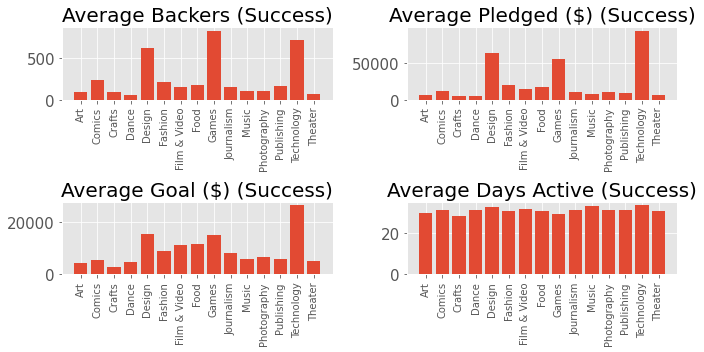

In [62]:
fig, ax = plt.subplots(2, 2, figsize = (10, 5))

ax[0,0].bar(x = successes.index, height = successes.backers)
ax[0,1].bar(x = successes.index, height = successes.usd_pledged_real)
ax[1,0].bar(x = successes.index, height = successes.usd_goal_real)
ax[1,1].bar(x = successes.index, height = successes.active_days)

ax[0,0].set_title('Average Backers (Success)')
ax[0,1].set_title('Average Pledged ($) (Success)')
ax[1,0].set_title('Average Goal ($) (Success)')
ax[1,1].set_title('Average Days Active (Success)')

ax[0,0].set_xticklabels(successes.index, rotation=90)
ax[0,1].set_xticklabels(successes.index, rotation=90)
ax[1,0].set_xticklabels(successes.index, rotation=90)
ax[1,1].set_xticklabels(successes.index, rotation=90)
fig.tight_layout()

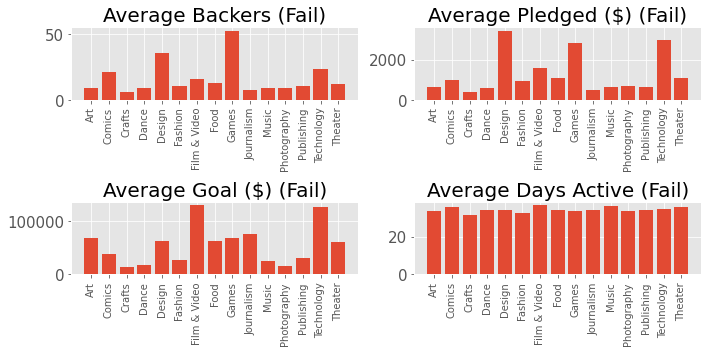

In [63]:
fig, ax = plt.subplots(2, 2, figsize = (10, 5))

ax[0,0].bar(x = failures.index, height = failures.backers)
ax[0,1].bar(x = failures.index, height = failures.usd_pledged_real)
ax[1,0].bar(x = failures.index, height = failures.usd_goal_real)
ax[1,1].bar(x = failures.index, height = failures.active_days)

ax[0,0].set_title('Average Backers (Fail)')
ax[0,1].set_title('Average Pledged ($) (Fail)')
ax[1,0].set_title('Average Goal ($) (Fail)')
ax[1,1].set_title('Average Days Active (Fail)')

ax[0,0].set_xticklabels(failures.index, rotation=90)
ax[0,1].set_xticklabels(failures.index, rotation=90)
ax[1,0].set_xticklabels(failures.index, rotation=90)
ax[1,1].set_xticklabels(failures.index, rotation=90)
fig.tight_layout()

In [64]:
# how many days until state reached?

# ratio = pd.DataFrame({'Days when Success Reached': successes.success_time_ratio,
#                    'Days when Fail Reached': failures.success_time_ratio}, index=successes.index)
# ax = ratio.plot.bar()

In [65]:
# drop original launch and deadline columns for redundancy
# df = df.drop(['deadline', 'launched'], axis =1)

In [66]:
df = df.drop(['deadline', 'launched', 'successful_at', 'successful_days', 'success_time_ratio'], axis=1)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354371 entries, 0 to 360636
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   name              354371 non-null  object 
 1   category          354371 non-null  object 
 2   main_category     354371 non-null  object 
 3   currency          354371 non-null  object 
 4   state             354371 non-null  int64  
 5   backers           354371 non-null  int64  
 6   country           354371 non-null  object 
 7   usd_pledged_real  354371 non-null  float64
 8   usd_goal_real     354371 non-null  float64
 9   comments_count    354371 non-null  int64  
 10  updates_count     354371 non-null  int64  
 11  spotlight         354371 non-null  int64  
 12  staff_pick        354371 non-null  int64  
 13  blurb             354371 non-null  object 
 14  reward_count      354371 non-null  int64  
 15  launch_year       354371 non-null  int64  
 16  launch_month      35

### For Modeling

In [68]:
# save df for modeling
df.to_csv('data/model_df.csv')

In [69]:
#NLP Dataframe

nlp = df[['name', 'blurb', 'state']];
nlp.head()

,name,blurb,state
0,The Songs of Adelaide & Abullah,A series of poems about pure love pursued by ...,0
1,Greeting From Earth: ZGAC Arts Capsule For ET,Back artists creating short movies of Greeting...,0
2,Where is Hank?,"Abandoned Property. Sounds of struggle, muffle...",0
3,ToshiCapital Rekordz Needs Help to Complete Album,Keeping Great Reggae Music Alive Through RAW T...,0
4,Community Film Project: The Art of Neighborhoo...,Community Film Project is creating a group tha...,0


In [70]:
# df without 'name' or 'country' column (or 'backers' or 'usd_pledged_real' causing data leakage)

df1 = df[['category','main_category', 'usd_goal_real','currency', 'country','launch_year', 'launch_month', 'launch_day','comments_count','updates_count','spotlight','staff_pick','active_days', 'state']]

In [71]:
#visualize successful projects

df[df['state']==1].head(10)

,name,category,main_category,currency,state,backers,country,usd_pledged_real,usd_goal_real,comments_count,updates_count,spotlight,staff_pick,blurb,reward_count,launch_year,launch_month,launch_day,active_days
5,Monarch Espresso Bar,Restaurants,Food,USD,1,224,US,52375.00,50000.00,3,3,1,0,"Alumni-owned, community-powered craft coffee s...",16,2016,2,26,34
6,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,1,16,US,1205.00,1000.00,0,4,1,0,Help offset your carbon footprint of coffee. ...,8,2014,12,1,19
11,Lisa Lim New CD!,Indie Rock,Music,USD,1,100,US,12700.00,12500.00,5,20,1,0,Fresh new music coming at ya on Lisa Lim's new...,20,2013,3,9,29
14,Tombstone: Old West tabletop game and miniatur...,Tabletop Games,Games,GBP,1,761,GB,121857.33,6469.73,944,33,1,0,"Old west gaming rulebook available in English,...",11,2017,4,5,27
17,Mike Corey's Darkness & Light Album,Music,Music,USD,1,7,US,250.00,250.00,0,3,1,0,Based on the true story of the artist himself ...,3,2012,8,2,14
19,CMUK. Shoes: Take on Life Feet First.,Fashion,Fashion,USD,1,624,US,34268.00,20000.00,260,15,1,0,"Anytime, Anywhere Footwear. Explore your homet...",12,2013,11,25,34
23,The Book Zoo - A Mini-Comic,Comics,Comics,USD,1,66,US,701.66,175.00,0,15,1,1,A 20 Page Story About Books in a Petting Zoo,8,2014,10,23,19
24,Matt Cavenaugh & Jenny Powers make their 1st a...,Music,Music,USD,1,147,US,15827.00,10000.00,26,11,1,0,We're joining forces to self-produce our 1st a...,14,2010,12,7,29
26,Permaculture Skills,Webseries,Film & Video,CAD,1,571,CA,42174.03,15313.04,23,12,1,0,A film series distilled from 20 days of cold-c...,11,2014,11,14,29
27,My Moon - Animated Short Film,Animation,Film & Video,USD,1,840,US,57577.31,50000.00,39,25,1,1,The Earth struggles to balance her relationshi...,13,2017,4,3,29


In [72]:
df1.shape

(354371, 14)

In [73]:
# get dummies for main_category, currency, and country

df1 = pd.get_dummies(df1, columns= ['category','main_category', 'currency'], drop_first = True)


In [74]:
df1.shape

(354371, 196)

In [75]:
df1.head()

,usd_goal_real,country,launch_year,launch_month,launch_day,comments_count,updates_count,spotlight,staff_pick,active_days,...,currency_EUR,currency_GBP,currency_HKD,currency_JPY,currency_MXN,currency_NOK,currency_NZD,currency_SEK,currency_SGD,currency_USD
0,1533.95,GB,2015,8,11,0,0,0,0,58,...,0,1,0,0,0,0,0,0,0,0
1,30000.00,US,2017,9,2,0,11,0,1,59,...,0,0,0,0,0,0,0,0,0,1
2,45000.00,US,2013,1,12,0,0,0,0,44,...,0,0,0,0,0,0,0,0,0,1
3,5000.00,US,2012,3,17,0,8,0,0,29,...,0,0,0,0,0,0,0,0,0,1
4,19500.00,US,2015,7,4,1,1,0,1,55,...,0,0,0,0,0,0,0,0,0,1


In [76]:
# Obvious problem (data leakage): If usd_pledged_real >= usd_goal_real, then success. Should be biggest indicator, backers as well
    # dont include in models

# Other thoughts:
    # How many competitors in each category?
    # Which categories tend to succeed more often?
    # how many days of activity is best?

# More data desired:
    # Company statistics

In [77]:
# Profit curve for expectation to succeed based on pledge goal

# Ex. False Positive means you get no funding, false negative means you could have raised the goal (riskier)